In [9]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imutils
import time

## Get centroids of gate from Excel labels

In [50]:
df = pd.read_csv('WashingtonOBRace/corners.csv',header = None)
df = df.drop_duplicates(subset=0)
df = df.reset_index()

image_name = []
centroid_lst = []
for i in range(len(df)):
    sum_x = df[1][i] + df[3][i] + df[5][i] + df[7][i]
    sum_y = df[2][i] + df[4][i] + df[6][i] + df[8][i]
    centroid = (np.floor_divide(sum_x, 4), np.floor_divide(sum_y, 4))
    image_name.append(df[0][i])
    centroid_lst.append(centroid) 

centroids = np.array(centroid_lst)
image_names = np.array(image_name).reshape(len(image_name),1)
centroid_labels = np.hstack((image_names, centroids))
df.head()

index            0    1    2    3    4    5    6    7    8
0      0   img_10.png   99  179  172  179  173  241  101  251
1      2   img_11.png   97  201  170  199  172  262   97  273
2      4  img_110.png  161  128  212  131  209  182  158  181
3      7  img_111.png  150  133  208  139  206  192  148  191
4     10  img_112.png  149  141  208  147  205  201  144  201

## ORB feature detection without filter

WashingtonOBRace2\img_13.png
Not enough matches are found - 7/10


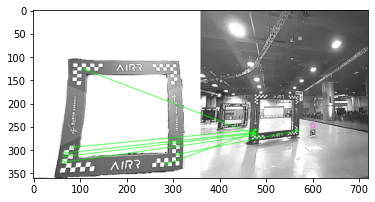

WashingtonOBRace2\img_177.png
centroid =  (533, 285)


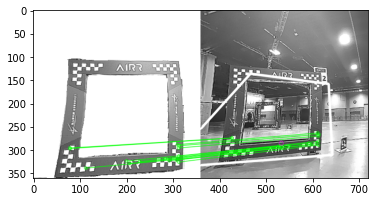

WashingtonOBRace2\img_178.png
centroid =  (522, 287)


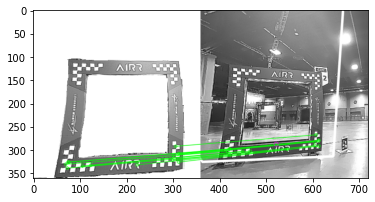

WashingtonOBRace2\img_179.png
centroid =  (517, 289)


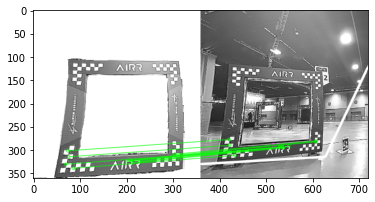

WashingtonOBRace2\img_180.png
centroid =  (508, 300)


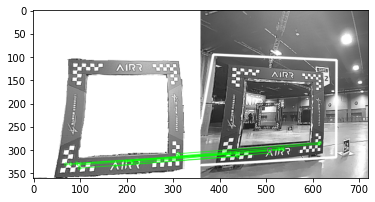

WashingtonOBRace2\img_181.png
centroid =  (493, 296)


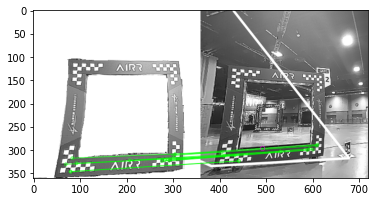

WashingtonOBRace2\img_182.png
centroid =  (504, 292)


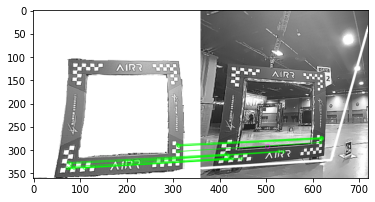

WashingtonOBRace2\img_183.png
centroid =  (502, 283)


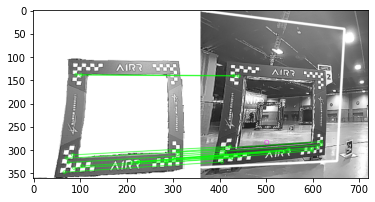

WashingtonOBRace2\img_184.png
centroid =  (509, 267)


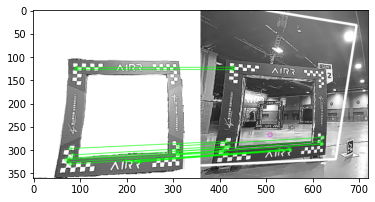

WashingtonOBRace2\img_185.png
centroid =  (488, 288)


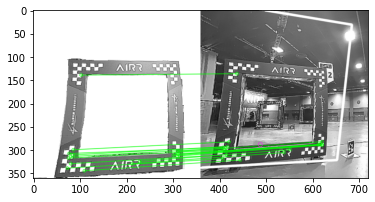

WashingtonOBRace2\img_186.png
centroid =  (472, 271)


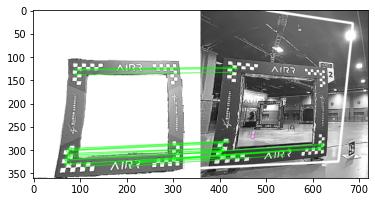

WashingtonOBRace2\img_187.png
centroid =  (490, 278)


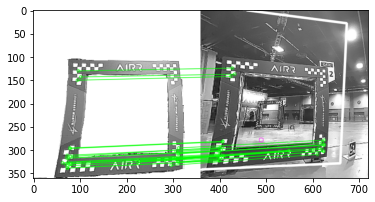

WashingtonOBRace2\img_188.png
centroid =  (507, 292)


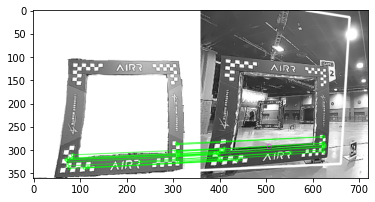

WashingtonOBRace2\img_189.png
centroid =  (489, 290)


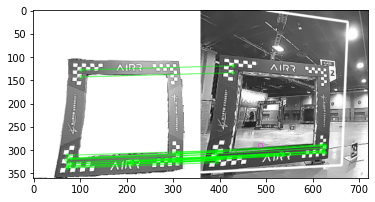

WashingtonOBRace2\img_190.png
centroid =  (502, 284)


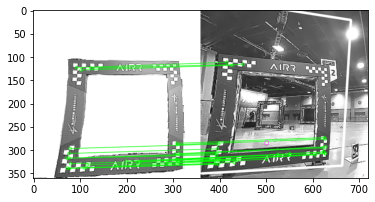

WashingtonOBRace2\img_191.png
centroid =  (473, 277)


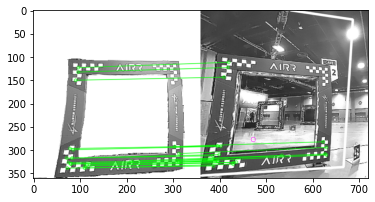

WashingtonOBRace2\img_192.png
centroid =  (525, 273)


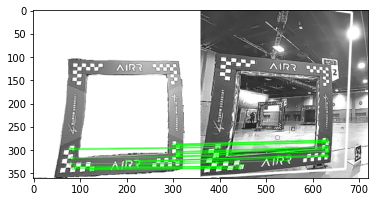

WashingtonOBRace2\img_193.png
centroid =  (493, 275)


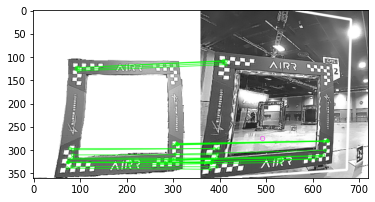

WashingtonOBRace2\img_194.png
centroid =  (528, 291)


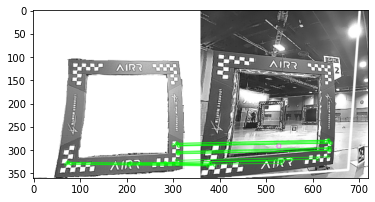

WashingtonOBRace2\img_195.png
centroid =  (555, 278)


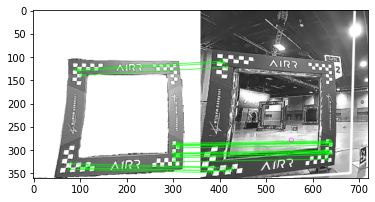

WashingtonOBRace2\img_196.png
centroid =  (577, 272)


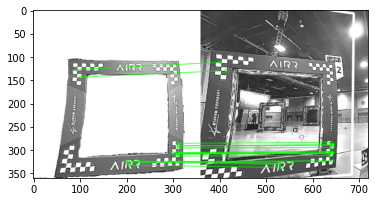

WashingtonOBRace2\img_197.png
centroid =  (586, 280)


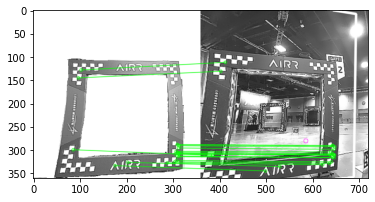

WashingtonOBRace2\img_198.png
centroid =  (559, 248)


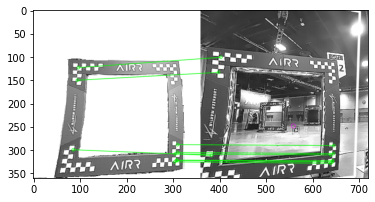

WashingtonOBRace2\img_199.png
centroid =  (585, 261)


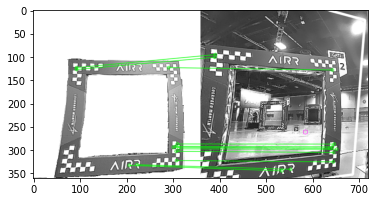

WashingtonOBRace2\img_200.png
centroid =  (612, 286)


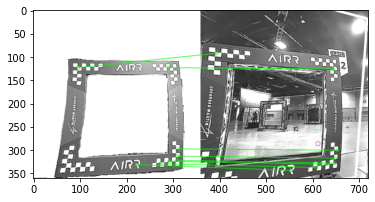

WashingtonOBRace2\img_202.png
centroid =  (582, 257)


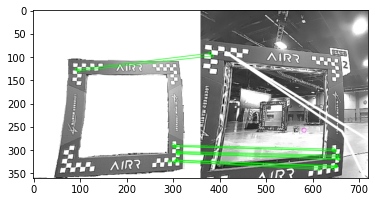

WashingtonOBRace2\img_203.png
centroid =  (629, 286)


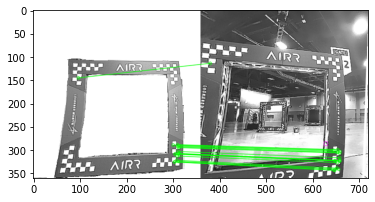

WashingtonOBRace2\img_204.png
centroid =  (600, 272)


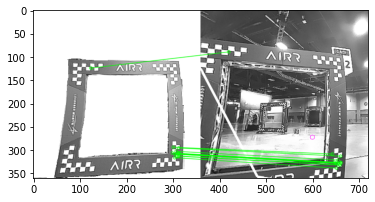

WashingtonOBRace2\img_205.png
Not enough matches are found - 10/10


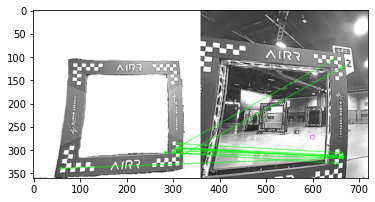

WashingtonOBRace2\img_414.png
centroid =  (470, 261)


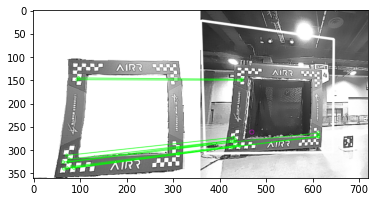

WashingtonOBRace2\img_415.png
centroid =  (500, 259)


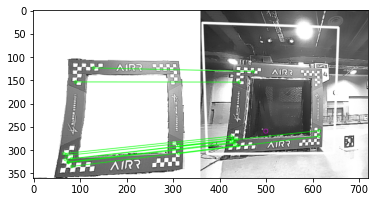

WashingtonOBRace2\img_416.png
centroid =  (484, 265)


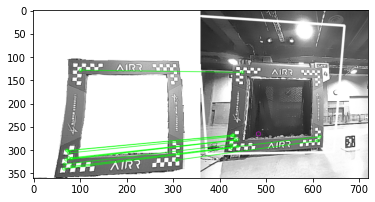

WashingtonOBRace2\img_417.png
centroid =  (528, 264)


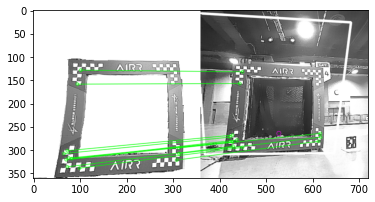

WashingtonOBRace2\img_418.png
centroid =  (572, 264)


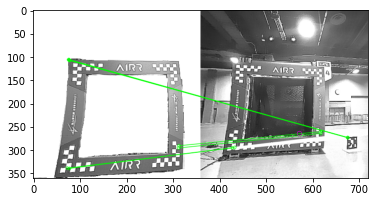

WashingtonOBRace2\img_419.png
centroid =  (463, 263)


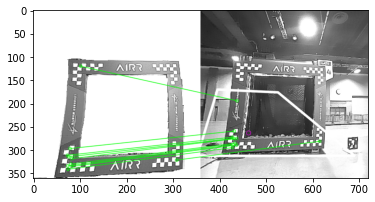

WashingtonOBRace2\img_420.png
centroid =  (514, 258)


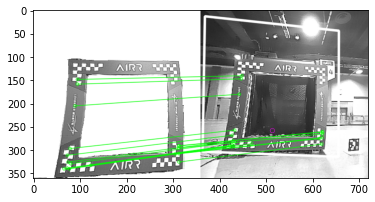

WashingtonOBRace2\img_421.png
centroid =  (527, 258)


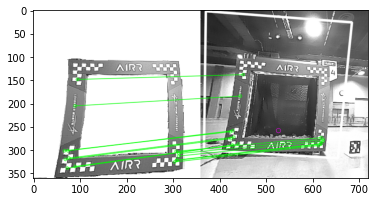

WashingtonOBRace2\img_422.png
centroid =  (488, 257)


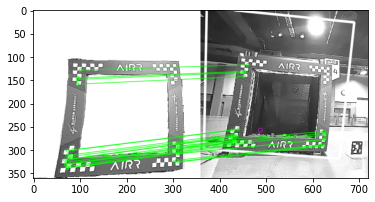

WashingtonOBRace2\img_423.png
centroid =  (480, 263)


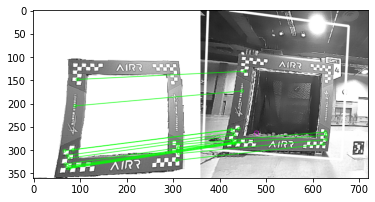

WashingtonOBRace2\img_424.png
Not enough matches are found - 9/10


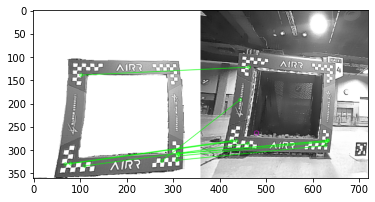

WashingtonOBRace2\img_425.png
centroid =  (519, 269)


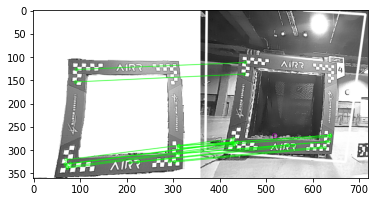

WashingtonOBRace2\img_426.png
Not enough matches are found - 10/10


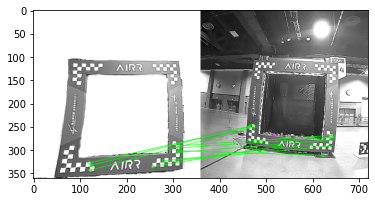

WashingtonOBRace2\img_427.png
centroid =  (500, 255)


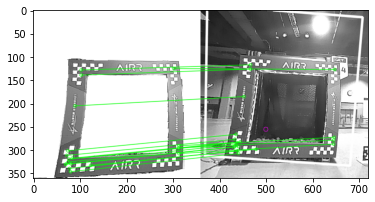

WashingtonOBRace2\img_428.png
centroid =  (507, 282)


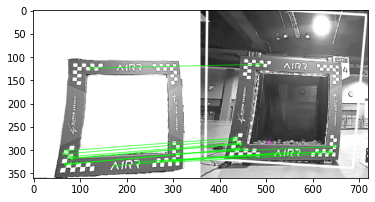

WashingtonOBRace2\img_429.png
centroid =  (504, 288)


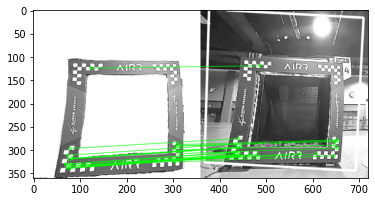

WashingtonOBRace2\img_430.png
centroid =  (505, 265)


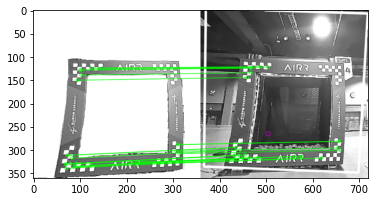

WashingtonOBRace2\img_431.png
centroid =  (518, 282)


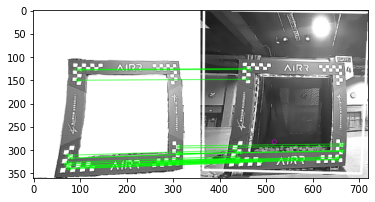

WashingtonOBRace2\img_432.png
centroid =  (547, 301)


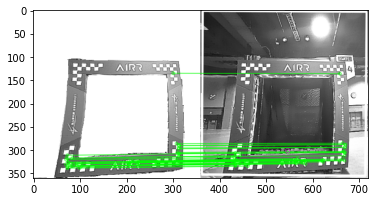

WashingtonOBRace2\img_433.png
centroid =  (549, 281)


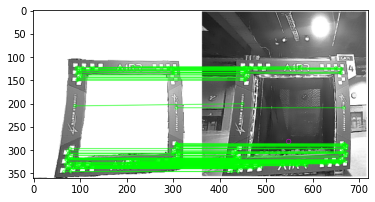

WashingtonOBRace2\img_434.png
centroid =  (546, 297)


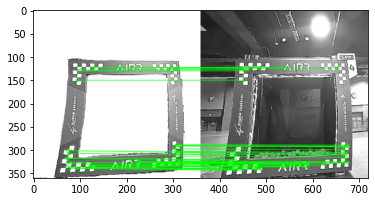

WashingtonOBRace2\img_435.png
centroid =  (600, 307)


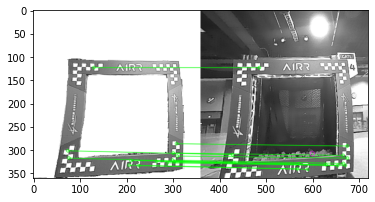

WashingtonOBRace2\img_436.png
centroid =  (590, 279)


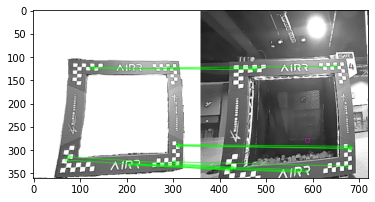

WashingtonOBRace2\img_437.png
centroid =  (555, 242)


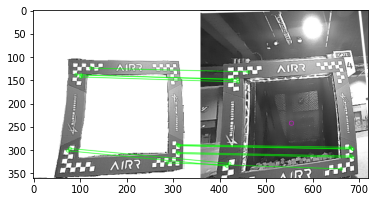

WashingtonOBRace2\img_438.png
centroid =  (616, 269)


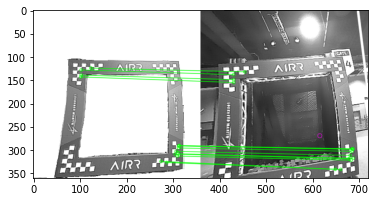

average time = 0.02168610802403203
recall = 0.7592592592592593


In [99]:
imdir = 'WashingtonOBRace2'
files = os.listdir(imdir)
cv2.startWindowThread()
centroid_lst = []
time_cumul = 0
recall = 0
file_lst = []
for file in files:
    path = os.path.join(imdir, file)
    print(path)
    imgT = cv2.imread(path,0)
    # plt.imshow(imgT, 'gray'),plt.show()
    ## Load the query and train image. 0 is used to load image in grayscale
    imgQ = cv2.imread('Queries/img_433_query.png',0) # Query image
#     imgQ = cv2.imread('WashingtonOBRace3/mask_14.png',0)
    # imgQ = cv2.imread('WashingtonOBRace/query_blocks.png',0) # Query image
    # imgQ = cv2.imread('WashingtonOBRace/sobelQ.png',0) # Query image
    
#     imgT = cv2.GaussianBlur(imgT, (5, 5), 0)
#     imgQ = cv2.GaussianBlur(imgQ, (5, 5), 0)

    start_time = time.time()
    
    orbQ = cv2.ORB_create(edgeThreshold = 0, patchSize = 32, nfeatures=600)
    orbT = cv2.ORB_create(edgeThreshold = 0, patchSize = 32, nfeatures=1500)

    kpQ, desQ = orbQ.detectAndCompute(imgQ, None)
    kpT, desT = orbT.detectAndCompute(imgT, None)

    FLANN_INDEX_KDTREE = 0
    # index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH,
                       table_number = 6, # 12
                       key_size = 12,     # 20
                       multi_probe_level = 1) #2

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(desQ,desT,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    points = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    

    ## define the minimum amount of 10 matches
    MIN_MATCH_COUNT = 10
    
    
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kpQ[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpT[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        points.append(dst_pts)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = imgQ.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        imgT = cv2.polylines(imgT,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        
        point_list = np.asarray(dst_pts, dtype=np.int32)
        length = point_list.shape[0]
        sum_x = np.sum(point_list[:, 0, 0])
        sum_y = np.sum(point_list[:, 0, 1])
        centroid = (np.floor_divide(sum_x, length)+w, np.floor_divide(sum_y, length))
        centroid2 = (np.floor_divide(sum_x, length), np.floor_divide(sum_y, length)) # without the width correction
        end_time = time.time()
        time_cumul += end_time - start_time
        file_lst.append(file)
        centroid_lst.append(centroid2)
        print('centroid = ', centroid)
        
        loc = df.loc[df[0] == file]
        if centroid2[0] > int(loc[1]) and centroid2[0] > int(loc[7]) and  centroid2[0] < int(loc[3]) and centroid2[0] < int(loc[5]) \
            and centroid2[1] > int(loc[2]) and centroid2[1] > int(loc[4]) and centroid2[1] < int(loc[6]) \
            and centroid2[1] < int(loc[8]):
            recall += 1
        distance = int(np.sqrt(h**2 + w**2))
        

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None


    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    img3 = cv2.drawMatches(imgQ,kpQ,imgT,kpT,good,None,**draw_params)
    cv2.circle(img3, centroid, 5, (255,0,255))



    plt.imshow(img3, 'gray'),plt.show()

file_lst = np.array(file_lst).reshape(len(file_lst),1)
centroid_lst = np.array(centroid_lst)
centroid_detected = np.hstack((file_lst, centroid_lst))

avg_time = time_cumul / len(files)
print('average time =', avg_time)
print('recall =', recall/len(files))

In [82]:
loc

index            0   1    2    3    4    5    6   7    8
277    594  img_438.png  78  146  277  130  301  320  82  355

In [30]:
avg_t = time_cumul / (len(files)-15)
avg_t

0.0483556160560021

49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0
49 0


Text(0.5, 0, 'FP rate')

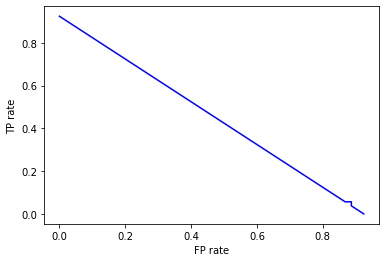

In [251]:
mask1 = np.in1d(centroid_labels[:,0], centroid_detected[:,0])
mask2 = np.in1d(centroid_detected[:,0], centroid_labels[:,0])
matches = np.column_stack(( centroid_labels[mask1], centroid_detected[mask2,1:] ))
matches = pd.DataFrame(matches)
matches[[1,2,3,4]] = matches[[1,2,3,4]].apply(pd.to_numeric)
matches['distance'] = np.sqrt((matches[1]-matches[3])**2 + (matches[2] - matches[4])**2)

TPR = np.zeros([distance, 1])
FPR = np.zeros([distance, 1])
tpr = 0
fpr = 0
for d in reversed(range(distance)):
    for i in range(len(matches)):
        if matches['distance'][i] <= d:
            tpr += 1
        if matches['distance'][i] >= d:
            fpr += 1
        
    TPR[d] = tpr / len(files)
    FPR[d] = fpr / len(files)
    print(tpr,fpr)
    tpr = 0
    fpr = 0

# plot the ROC curve:
plt.figure()
plt.plot(FPR, TPR, 'b')
plt.ylabel('TP rate')
plt.xlabel('FP rate')

## Make ROC curve for masked images

In [263]:
imdir = 'WashingtonOBRace3'
files = os.listdir(imdir)
centroids_mask = []
for file in files[1:10]:
    path = os.path.join(imdir, file)
    print(path)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE==1,
        cv2.CHAIN_APPROX_SIMPLE)

    cnts = imutils.grab_contours(cnts)

    # loop over the contours
    cX = 0
    cY = 0
    for c in cnts:
        # compute the center of the contour
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # draw the contour and center of the shape on the image
        cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
        centroids_mask.append([file,cX,cY])

mask1 = np.in1d(centroid_labels[:,0], centroid_mask[:,0])
mask2 = np.in1d(centroid_mask[:,0], centroid_labels[:,0])
matches = np.column_stack(( centroid_labels[mask1], centroid_detected[mask2,1:] ))
matches = pd.DataFrame(matches)
matches[[1,2,3,4]] = matches[[1,2,3,4]].apply(pd.to_numeric)
matches['distance'] = np.sqrt((matches[1]-matches[3])**2 + (matches[2] - matches[4])**2)
        
TPR_mask = np.zeros([distance, 1])
FPR_mask = np.zeros([distance, 1])
tpr = 0
fpr = 0
for d in reversed(range(distance)):
    for i in range(len(matches)):
        if matches['distance'][i] <= d:
            tpr += 1
        if matches['distance'][i] >= d:
            fpr += 1
        
    TPR_mask[d] = tpr / len(files)
    FPR_mask[d] = fpr / len(files)
    print(tpr,fpr)
    tpr = 0
    fpr = 0

# plot the ROC curve:
plt.figure()
plt.plot(FPR, TPR, 'b')
plt.ylabel('TP rate')
plt.xlabel('FP rate')

WashingtonOBRace3\mask_11.png
WashingtonOBRace3\mask_110.png
WashingtonOBRace3\mask_111.png
WashingtonOBRace3\mask_112.png
WashingtonOBRace3\mask_113.png
WashingtonOBRace3\mask_114.png
WashingtonOBRace3\mask_115.png
WashingtonOBRace3\mask_116.png
WashingtonOBRace3\mask_117.png


TypeError: list indices must be integers or slices, not str

## Sobel filter  

WashingtonOBRace\img_10.png
Not enough matches are found - 5/10


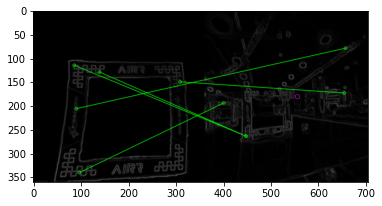

WashingtonOBRace\img_11.png
Not enough matches are found - 3/10


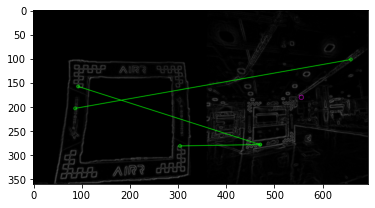

WashingtonOBRace\img_110.png
Not enough matches are found - 3/10


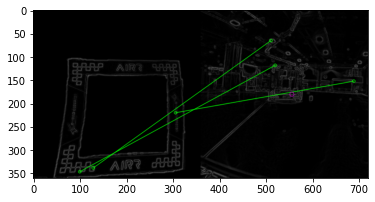

WashingtonOBRace\img_111.png
Not enough matches are found - 1/10


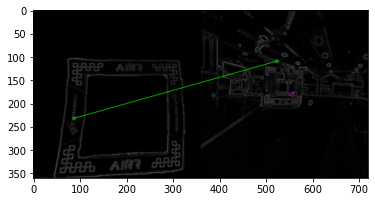

WashingtonOBRace\img_112.png
Not enough matches are found - 1/10


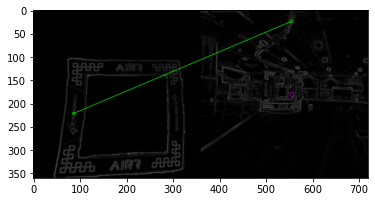

WashingtonOBRace\img_113.png
Not enough matches are found - 1/10


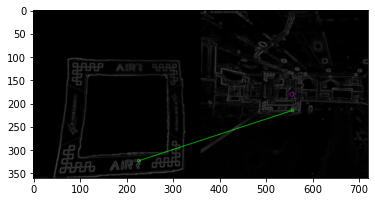

WashingtonOBRace\img_114.png
Not enough matches are found - 3/10


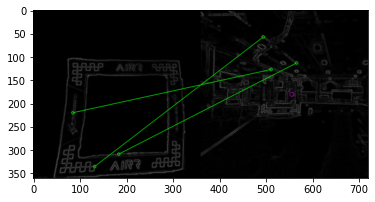

WashingtonOBRace\img_114_query.png


ValueError: not enough values to unpack (expected 2, got 0)

In [110]:
imdir = 'WashingtonOBRace'
files = os.listdir(imdir)
cv2.startWindowThread()
time_cumul = 0
recall = 0
for file in files:
    path = os.path.join(imdir, file)
    print(path)
    imgT = cv2.imread(path,0)
    # plt.imshow(imgT, 'gray'),plt.show()
    ## Load the query and train image. 0 is used to load image in grayscale
    imgQ = cv2.imread('Queries/img_433_query.png',0) # Query image
    # imgQ = cv2.imread('WashingtonOBRace/query_blocks.png',0) # Query image
    # imgQ = cv2.imread('WashingtonOBRace/sobelQ.png',0) # Query image
    
    start_time = time.time();
    
    imgT = cv2.GaussianBlur(imgT, (5,5), 0)
    imgQ = cv2.GaussianBlur(imgQ, (5,5), 0)
    
#     window_name = ('Sobel Demo - Simple Edge Detector')
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    #gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


    grad_xT = cv2.Sobel(imgT, ddepth, 1, 0, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_xQ = cv2.Sobel(imgQ, ddepth, 1, 0, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_yT = cv2.Sobel(imgT, ddepth, 0, 1, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_yQ = cv2.Sobel(imgQ, ddepth, 0, 1, ksize=1, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    abs_grad_xT = cv2.convertScaleAbs(grad_xT)
    abs_grad_xQ = cv2.convertScaleAbs(grad_xQ)
    abs_grad_yT = cv2.convertScaleAbs(grad_yT)
    abs_grad_yQ = cv2.convertScaleAbs(grad_yQ)


    imgT = cv2.addWeighted(abs_grad_xT, 0.5, abs_grad_yT, 0.5, 0)
    imgQ = cv2.addWeighted(abs_grad_xQ, 0.5, abs_grad_yQ, 0.5, 0)

    orb = cv2.ORB_create(edgeThreshold = 0, patchSize = 32, nfeatures=2000)

    kpQ, desQ = orb.detectAndCompute(imgQ, None)
    kpT, desT = orb.detectAndCompute(imgT, None)

    FLANN_INDEX_KDTREE = 0
    # index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH,
                       table_number = 6, # 12
                       key_size = 12,     # 20
                       multi_probe_level = 1) #2

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(desQ,desT,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    points = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    end_time = time.time();
    
    ## define the minimum amount of 10 matches
    MIN_MATCH_COUNT = 10

    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kpQ[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpT[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        points.append(dst_pts)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = imgQ.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        imgT = cv2.polylines(imgT,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        
        point_list = np.asarray(dst_pts, dtype=np.int32)
        length = point_list.shape[0]
        sum_x = np.sum(point_list[:, 0, 0])
        sum_y = np.sum(point_list[:, 0, 1])
        centroid = (np.floor_divide(sum_x, length)+w, np.floor_divide(sum_y, length))
        centroid2 = (np.floor_divide(sum_x, length), np.floor_divide(sum_y, length))
        print('centroid = ', centroid)
        time_cumul += end_time - start_time
        print('time =' , end_time - start_time)
        loc = df.loc[df[0] == file]
            
        if centroid2[0] > int(loc[1]) and centroid2[0] > int(loc[7]) and  centroid2[0] < int(loc[3]) and centroid2[0] < int(loc[5]) \
            and centroid2[1] > int(loc[2]) and centroid2[1] > int(loc[4]) and centroid2[1] < int(loc[6]) \
            and centroid2[1] < int(loc[8]):
            recall += 1

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None


    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    img3 = cv2.drawMatches(imgQ,kpQ,imgT,kpT,good,None,**draw_params)
    cv2.circle(img3, centroid, 5, (255,0,255))



    plt.imshow(img3, 'gray'),plt.show()
avg_time = time_cumul / len(files)
print('average time = ', avg_time)
print('recall =', recall/len(files))

In [76]:
len(files)

54

## Canny edge with erosion & dilation

In [107]:
imdir = 'WashingtonOBRace'
files = os.listdir(imdir)
cv2.startWindowThread()
time_cumul = 0
recall = 0
for file in files:
    path = os.path.join(imdir, file)
    print(path)
    imgT = cv2.imread(path,0)
    # plt.imshow(imgT, 'gray'),plt.show()
    ## Load the query and train image. 0 is used to load image in grayscale
    imgQ = cv2.imread('Queries/img_433_query.png',0) # Query image
    # imgQ = cv2.imread('WashingtonOBRace/query_blocks.png',0) # Query image
    # imgQ = cv2.imread('WashingtonOBRace/sobelQ.png',0) # Query image
    
    start_time = time.time()
    kernel = np.ones((3,3), np.uint8)
    
    img_erosionT = cv2.erode(imgT, kernel, iterations=1)
    img_dilationT = cv2.dilate(img_erosionT, kernel, iterations=1)
    img_erosionQ = cv2.erode(imgQ, kernel, iterations=1)
    img_dilationQ = cv2.dilate(img_erosionQ, kernel, iterations=1)

    imgT = cv2.Canny(img_dilationT,100,200)
    imgQ = cv2.Canny(img_dilationQ,100,200)

    orb = cv2.ORB_create(edgeThreshold = 0, patchSize = 32, nfeatures=2000)

    kpQ, desQ = orb.detectAndCompute(imgQ, None)
    kpT, desT = orb.detectAndCompute(imgT, None)

    FLANN_INDEX_KDTREE = 0
    # index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH,
                       table_number = 6, # 12
                       key_size = 12,     # 20
                       multi_probe_level = 1) #2

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(desQ,desT,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    points = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    end_time = time.time()
    time_cumul += end_time - start_time
    ## define the minimum amount of 10 matches
    MIN_MATCH_COUNT = 10

    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kpQ[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpT[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        points.append(dst_pts)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = imgQ.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        imgT = cv2.polylines(imgT,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        
        point_list = np.asarray(dst_pts, dtype=np.int32)
        length = point_list.shape[0]
        sum_x = np.sum(point_list[:, 0, 0])
        sum_y = np.sum(point_list[:, 0, 1])
        centroid = (np.floor_divide(sum_x, length)+w, np.floor_divide(sum_y, length))
        centroid2 = (np.floor_divide(sum_x, length), np.floor_divide(sum_y, length))
        print('centroid = ', centroid)
        
        loc = df.loc[df[0] == file]
            
        if centroid2[0] > int(loc[1]) and centroid2[0] > int(loc[7]) and  centroid2[0] < int(loc[3]) and centroid2[0] < int(loc[5]) \
            and centroid2[1] > int(loc[2]) and centroid2[1] > int(loc[4]) and centroid2[1] < int(loc[6]) \
            and centroid2[1] < int(loc[8]):
            recall += 1

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None


    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    img3 = cv2.drawMatches(imgQ,kpQ,imgT,kpT,good,None,**draw_params)
    cv2.circle(img3, centroid, 5, (255,0,255))



    plt.imshow(img3, 'gray'),plt.show()

avg_time = time_cumul / len(files)
print('average_time =', avg_time)
print('recall =', recall/ len(files))

WashingtonOBRace\checkQ.png


ValueError: not enough values to unpack (expected 2, got 1)

## Centroid location matching

In [ ]:
df = pd.read_csv('WashingtonOBRace/corners.csv',header = None)
image_name = []
centroid_lst = []
for i in range(len(df)):
    sum_x = df[1][i] + df[3][i] + df[5][i] + df[7][i]
    sum_y = df[2][i] + df[4][i] + df[6][i] + df[8][i]
    centroid = (np.floor_divide(sum_x, 4), np.floor_divide(sum_y, 4))
    image_name.append(df[0][i])
    centroid_lst.append(centroid) 

centroids = np.array(centroid_lst)
image_names = np.array(image_name).reshape(len(image_name),1)
combined = np.hstack((image_names, centroids))

def get_ROC_curve(centroid_label, centroids):

    # get number of positives and negatives:    
    n_images = len(files)
    totalP = len(np.where(classes > 0)[0])
    totalN = n_values - totalP
    
    # sort all values:
    inds = np.argsort(values)
    s_values = values[inds]
    s_classes = classes[inds]

    TP = np.zeros([n_images, 1])
    FP = np.zeros([n_images, 1])

    h,w = imgT.shape
    distance = np.sqrt(h**2 + w**2)
    
    for d in range(distance):
        # threshold = s_values[e]
        # Positive when bigger:
        P = np.sum(s_classes[e:])
        TP[e] = P / totalP
    
        # number of false positives is the remaining samples above the
        # threshold divided by all negative samples:
        FP[e] = (len(s_classes[e:]) - P) / totalN

    return TP, FP;

In [44]:
len(files)

53